In [52]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [24]:
age_wwhs = pd.read_csv('./data/age_wwhs.csv', encoding='cp949')
entry_count_tracker = []
entry_count_tracker.append(age_wwhs.shape[0])
age_wwhs.dropna(inplace=True)
entry_count_tracker.append(age_wwhs.shape[0])
age_wwhs.loc[age_wwhs['기준년도']==2013, '연령대코드(5세단위)'] += 4

<Figure size 1000x600 with 0 Axes>

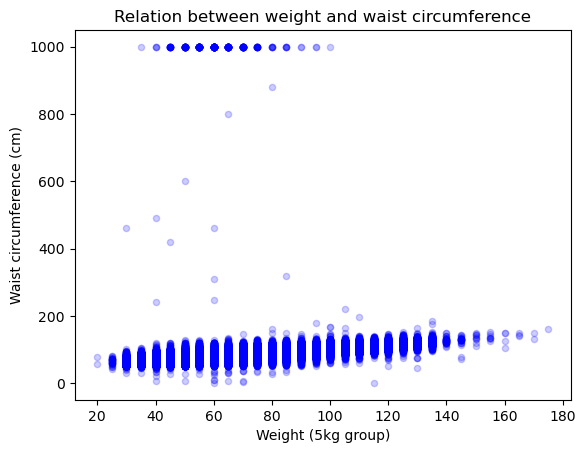

In [25]:
plt.figure(figsize=(10, 6))
age_wwhs.plot.scatter(x='체중(5kg단위)', y='허리둘레', alpha=0.2, color='blue')
plt.title('Relation between weight and waist circumference')
plt.xlabel('Weight (5kg group)')
plt.ylabel('Waist circumference (cm)')
plt.show()

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


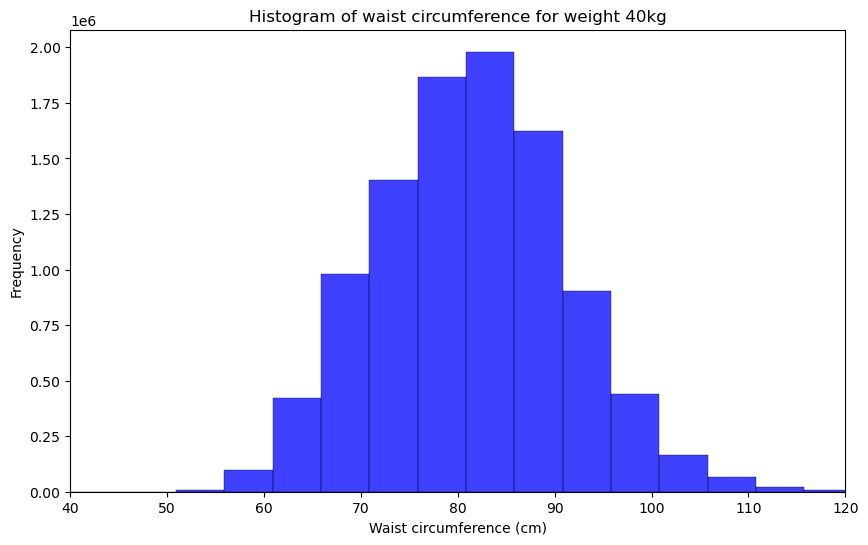

In [26]:
# Histograms of sight (left)
plt.figure(figsize=(10, 6))
sns.histplot(data=age_wwhs['체중(5kg단위)']==40, x=age_wwhs['허리둘레'], color='blue', bins=200)
plt.title('Histogram of waist circumference for weight 40kg')
plt.xlabel('Waist circumference (cm)')
plt.ylabel('Frequency')
plt.xlim(40, 120)
plt.show()

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


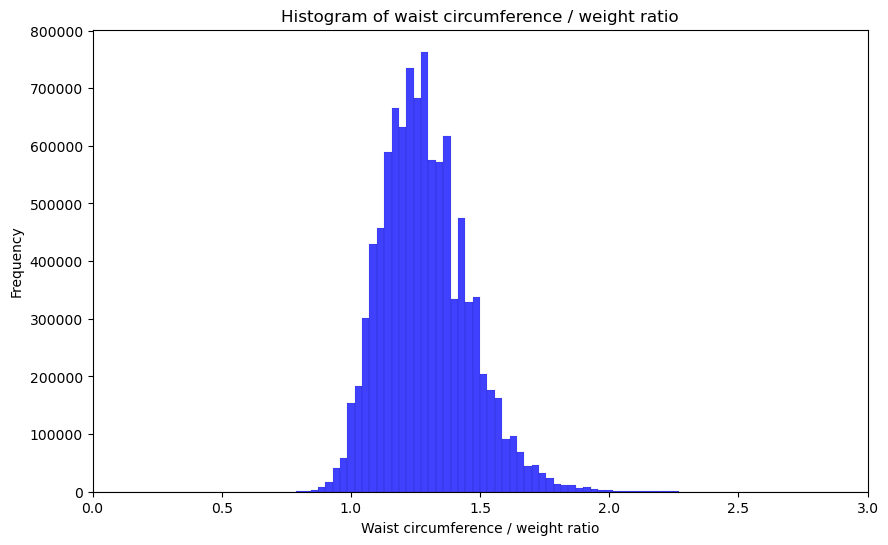

In [27]:
age_wwhs['waist_over_weight_ratio'] = age_wwhs['허리둘레'] / age_wwhs['체중(5kg단위)']
plt.figure(figsize=(10, 6))
sns.histplot(data=age_wwhs, x='waist_over_weight_ratio', color='blue', bins=1000)
plt.title('Histogram of waist circumference / weight ratio')
plt.xlabel('Waist circumference / weight ratio')
plt.ylabel('Frequency')
plt.xlim(0, 3)
plt.show()

In [28]:
print(f"{age_wwhs['waist_over_weight_ratio'].between(0.5, 3).sum() / age_wwhs.shape[0] * 100:.4f}% of the data is between 0.5 and 3") 

99.9969% of the data is between 0.5 and 3


In [29]:
# remove outliers from waist_over_weight_ratio

age_wwhs.drop(age_wwhs[age_wwhs['waist_over_weight_ratio'] < 0.5].index, inplace=True)
entry_count_tracker.append(age_wwhs.shape[0])
age_wwhs.drop(age_wwhs[age_wwhs['waist_over_weight_ratio'] > 3].index, inplace=True)
entry_count_tracker.append(age_wwhs.shape[0])

In [30]:
print(f"Entries: {entry_count_tracker[0]} -> {entry_count_tracker[1]} -> {entry_count_tracker[2]} -> {entry_count_tracker[3]}")
print(f"Outliers removed: {entry_count_tracker[0] - entry_count_tracker[3]}")
print(f"Percent of data remaining: {entry_count_tracker[3] / entry_count_tracker[0] * 100:.4f}%")

Entries: 10000000 -> 9993821 -> 9993800 -> 9993507
Outliers removed: 6493
Percent of data remaining: 99.9351%


In [32]:
# Possible values for hearing should only be 1 (regular) and 2 (abnormal)
age_wwhs.drop(age_wwhs[age_wwhs['청력(좌)']==3].index, inplace=True)
entry_count_tracker.append(age_wwhs.shape[0])
age_wwhs.drop(age_wwhs[age_wwhs['청력(우)']==3].index, inplace=True)
entry_count_tracker.append(age_wwhs.shape[0])
print(f"Entries: {entry_count_tracker[3]} -> {entry_count_tracker[4]} -> {entry_count_tracker[5]}")
print(f"Outliers removed: {entry_count_tracker[0] - entry_count_tracker[5]}")
print(f"Percent of data remaining: {entry_count_tracker[5] / entry_count_tracker[0] * 100:.4f}%")

Entries: 9993507 -> 9988592 -> 9986014
Outliers removed: 13986
Percent of data remaining: 99.8601%


In [45]:
age_group_yearly = age_wwhs.groupby(['기준년도', '연령대코드(5세단위)']).mean().reset_index()
print(age_group_yearly)

     기준년도  연령대코드(5세단위)  체중(5kg단위)       허리둘레     시력(좌)     시력(우)     청력(좌)  \
0    2013            5  59.318431  73.436204  1.046769  1.040566  1.003002   
1    2013            6  62.831045  76.254411  1.071194  1.065171  1.003320   
2    2013            7  67.015441  79.873513  1.095676  1.091475  1.004460   
3    2013            8  67.134710  80.756623  1.133059  1.126427  1.006001   
4    2013            9  63.734133  79.393002  1.085444  1.083598  1.008971   
..    ...          ...        ...        ...       ...       ...       ...   
135  2022           14  60.845941  83.190920  0.822192  0.823597  1.063316   
136  2022           15  59.568459  83.882213  0.777417  0.779707  1.101185   
137  2022           16  58.372361  84.446085  0.763598  0.766773  1.162682   
138  2022           17  56.276926  84.299484  0.746153  0.741624  1.221521   
139  2022           18  52.290534  82.627554  0.695689  0.755464  1.287535   

        청력(우)  waist_over_weight_ratio  
0    1.003448         

In [66]:
age_group_en = pd.DataFrame(columns=['year', 'age_groups', 'weight', 'waist', 'sight_left', 'sight_right', 'hearing_left', 'hearing_right', 'wow_ratio'])
for i in age_group_yearly['연령대코드(5세단위)'].unique():
    temp_df = age_group_yearly[age_group_yearly['연령대코드(5세단위)']==i]
    for index, row in temp_df.iterrows():
        new_row = {'year': row['기준년도'], 'age_groups': row['연령대코드(5세단위)'], 'weight': row['체중(5kg단위)'], 'waist': row['허리둘레'], 'sight_left': row['시력(좌)'], 'sight_right': row['시력(우)'], 'hearing_left': row['청력(좌)'], 'hearing_right': row['청력(우)'], 'wow_ratio': row['waist_over_weight_ratio']}
        age_group_en.loc[len(age_group_en)] = new_row

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


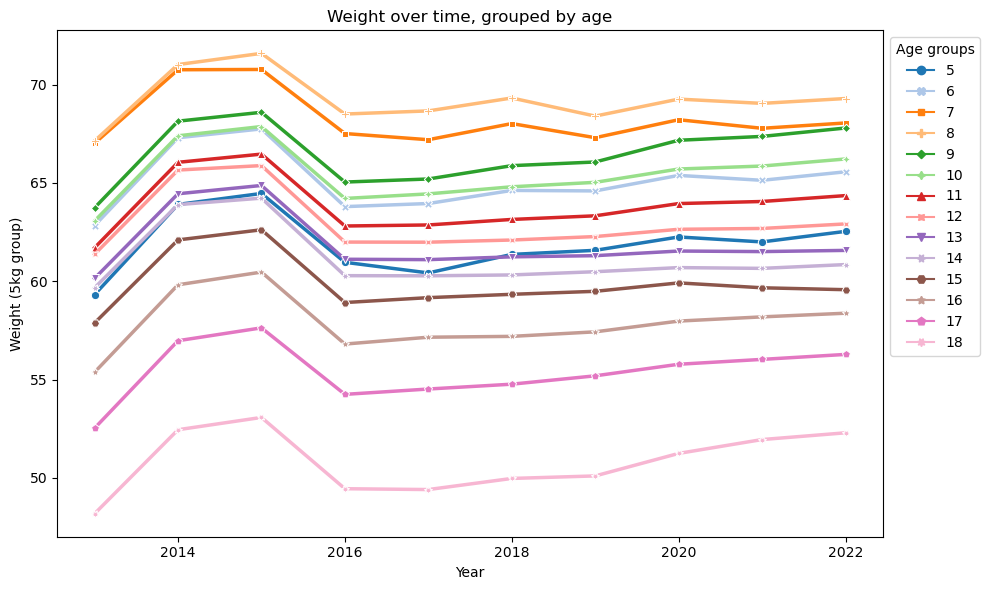

In [63]:
# Line graph of weight over time, grouped by age
plt.figure(figsize=(10, 6))
sns.lineplot(data=age_group_en, x='year', y='weight', hue='age_groups', style='age_groups', markers=True, dashes=False, palette='tab20', linewidth=2.5)
plt.title('Weight over time, grouped by age')
plt.xlabel('Year')
plt.ylabel('Weight (5kg group)')
plt.legend(title='Age groups', loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


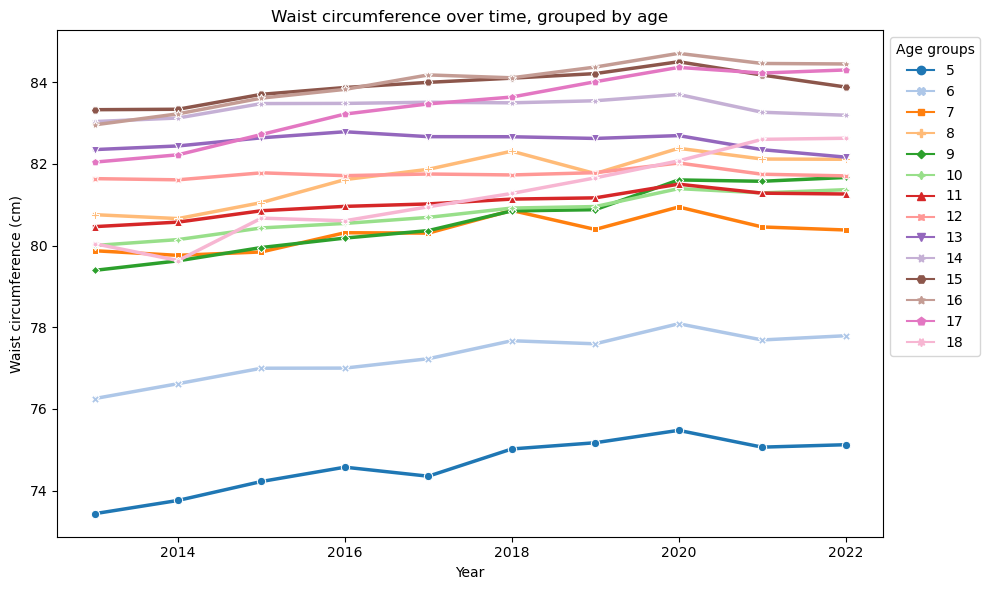

In [65]:
# Line graph of waist over time, grouped by age
plt.figure(figsize=(10, 6))
sns.lineplot(data=age_group_en, x='year', y='waist', hue='age_groups', style='age_groups', markers=True, dashes=False, palette='tab20', linewidth=2.5)
plt.title('Waist circumference over time, grouped by age')
plt.xlabel('Year')
plt.ylabel('Waist circumference (cm)')
plt.legend(title='Age groups', loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


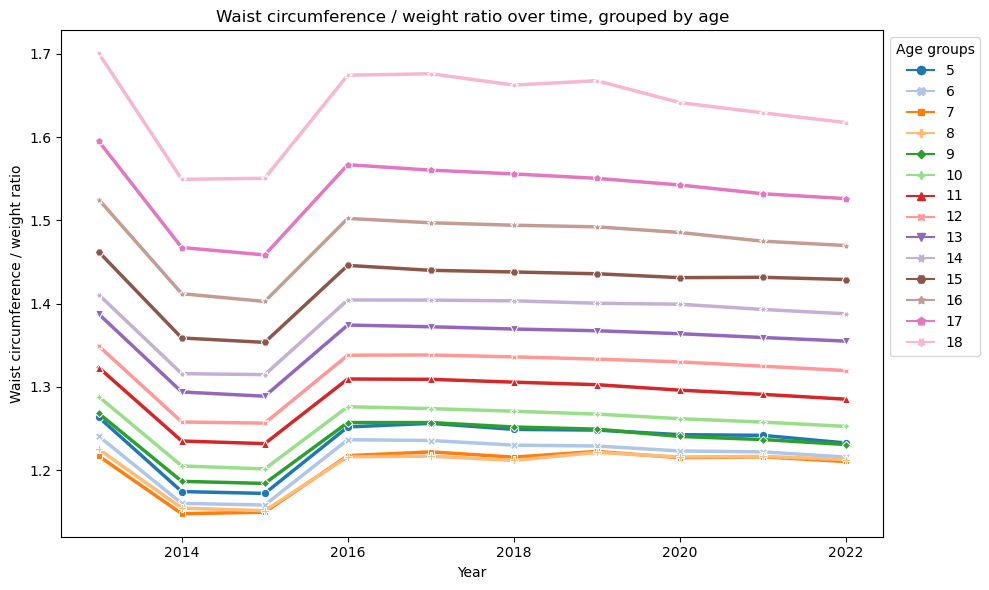

In [67]:
# Line graph of waist over weight ratio over time, grouped by age
plt.figure(figsize=(10, 6))
sns.lineplot(data=age_group_en, x='year', y='wow_ratio', hue='age_groups', style='age_groups', markers=True, dashes=False, palette='tab20', linewidth=2.5)
plt.title('Waist circumference / weight ratio over time, grouped by age')
plt.xlabel('Year')
plt.ylabel('Waist circumference / weight ratio')
plt.legend(title='Age groups', loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()

In [81]:
# Group the data by '연령대코드(5세단위)' and '기준년도'
grouped_data = age_wwhs.groupby(['연령대코드(5세단위)', '기준년도'])

# Create subplots based on the number of unique '연령대코드(5세단위)' values
fig, axes = plt.subplots(len(age_wwhs['기준년도'].unique()), len(age_wwhs['연령대코드(5세단위)'].unique()), figsize=(120, 80))

# Iterate over each unique '연령대코드(5세단위)' value
for i, year in enumerate(age_wwhs['기준년도'].unique()):
    # Get the data for the current '연령대코드(5세단위)' value
    for j, age_group in enumerate(age_wwhs['연령대코드(5세단위)'].unique()):
        age_group_data = grouped_data.get_group((age_group, year))
        
        # Create a histogram for '체중(5kg단위)' in the current age group
        axes[i][j].hist(age_group_data['체중(5kg단위)'], bins=15, alpha=1)
        axes[i][j].set_title(f'Age Group: {age_group}, Year: {year}')
        axes[i][j].set_xlabel('Weight')
        axes[i][j].set_ylabel('Frequency')
        axes[i][j].set_xlim(15, 180)
        axes[i][j].axvline(age_group_data['체중(5kg단위)'].mean(), color='red', lw=6)

# Set the overall title for the figure
fig.suptitle('Histograms of Weight by Age Group vs Year')

# Adjust the spacing between subplots
fig.tight_layout()

# Show the plot
plt.show()